# **Coronavirus World Data Analysis**

## **In this coursework you are expected to:**
*   Apply Data Analysis concepts and skills to a real-life business problem using Python.
*   Apply CRISP-DM and LSEP (Legal, Social, Ethical and Professional)  considerations for Data Modelling.
*   Develop teamwork competency through collaborating with your co-worker.
*   Write and communicate an academic project in a professional creative manner using Jupyter notebook.
*   Avoid plagiarism. I this case, all group members will get zero with `B` grade in the transcript.

# **Marks Breakdown:**

1.  **Data Preparation:** Manage `Null` values, and apply `drop, replace, column rename, and transformation methods`
2.  **Data Understanding:** Data summarization using `Data Visualization` and `filtering` methods 
3.  **Data Modelling:** Incorporate `Descriptive statistic` to quantitatively describe and summarize data (hint: use `apply`, `function`, `map`, `seaborn`, etc. methods)
4. **LSEP considerations:** Share your thoughts on the Legal, Social, Ethical and Professional (LSEP) considerations for Data analysis projects.
5.  PPDPlan (Personal Professional Development Plan) 

---


# **Import Libraries and Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# load data
data = pd.read_csv('/content/drive/MyDrive/Data-Science Edureka/Project/Corona Virus/worldometer_corona.csv')
data.sample(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
28,Bolivia,South America,11688459.0,86423,1282.0,3465.0,80.0,27373.0,936.0,55585.0,71.0,7394.0,296.0,183583.0,15706.0,Americas
56,Morocco,Africa,36953359.0,29644,NaN,449.0,NaN,20553.0,NaN,8642.0,31.0,802.0,12.0,1383816.0,37448.0,EasternMediterranean
17,Argentina,South America,45236884.0,228195,NaN,4251.0,NaN,99852.0,NaN,124092.0,1150.0,5044.0,94.0,794544.0,17564.0,Americas
174,Cambodia,Asia,16741375.0,243,NaN,NaN,NaN,210.0,NaN,33.0,1.0,15.0,NaN,67807.0,4050.0,WesternPacific
32,Ukraine,Europe,43705858.0,76808,NaN,1819.0,NaN,42524.0,NaN,32465.0,158.0,1757.0,42.0,1116641.0,25549.0,Europe


# **Data Preparation**
At this stage, you need to manage `Null` (missing) values, use transformation/aggregation methods such as `drop, replace, column rename, etc.` to prepare data for modelling, analysis, and visualization.

In [4]:
# Null Values
null_data = pd.DataFrame({'Count': data.isnull().sum(), 'Percentage':data.isnull().sum()/ len(data)})
null_data

,Count,Percentage
Country/Region,0,0.000000
Continent,1,0.004785
Population,1,0.004785
TotalCases,0,0.000000
NewCases,205,0.980861
TotalDeaths,21,0.100478
NewDeaths,206,0.985646
TotalRecovered,4,0.019139
NewRecovered,206,0.985646
ActiveCases,4,0.019139


In [5]:
null_data[null_data['Percentage'] > .90].index

Index(['NewCases', 'NewDeaths', 'NewRecovered'], dtype='object')

In [6]:
df = data.drop(['NewCases', 'NewDeaths', 'NewRecovered'], axis = 1)

In [7]:
# Not Null Values
not_null_data = pd.DataFrame({'Count': data.notnull().sum(), 'Percentage':data.notnull().sum()/ len(data)})
not_null_data

,Count,Percentage
Country/Region,209,1.000000
Continent,208,0.995215
Population,208,0.995215
TotalCases,209,1.000000
NewCases,4,0.019139
TotalDeaths,188,0.899522
NewDeaths,3,0.014354
TotalRecovered,205,0.980861
NewRecovered,3,0.014354
ActiveCases,205,0.980861


In [8]:
np.where(df['Tot Cases/1M pop'].isna())

(array([156]),)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       188 non-null    float64
 5   TotalRecovered    205 non-null    float64
 6   ActiveCases       205 non-null    float64
 7   Serious,Critical  122 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     187 non-null    float64
 10  TotalTests        191 non-null    float64
 11  Tests/1M pop      191 non-null    float64
 12  WHO Region        184 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 21.4+ KB


In [10]:
df['Continent'] = df['Continent'].fillna(df['Continent'].mode()[0])
df['Population'] = df['Population'].fillna(round(df['Population'].mean()))
df['TotalDeaths'] = df['TotalDeaths'].fillna(round(df['TotalDeaths'].mean()))
df['TotalRecovered'] = df['TotalRecovered'].fillna(round(df['TotalRecovered'].mean()))
df['ActiveCases'] = df['ActiveCases'].fillna(round(df['ActiveCases'].mean()))
df['Serious,Critical'] = df['Serious,Critical'].fillna(round(df['Serious,Critical'].mean()))
df['Tot Cases/1M pop'] = df['Tot Cases/1M pop'].fillna(round(df['Tot Cases/1M pop'].mean()))
df['Deaths/1M pop'] = df['Deaths/1M pop'].fillna(round(df['Deaths/1M pop'].mean()))
df['TotalTests'] = df['TotalTests'].fillna(round(df['TotalTests'].mean()))
df['Tests/1M pop'] = df['Tests/1M pop'].fillna(round(df['Tests/1M pop'].mean()))
df['WHO Region'] = df['WHO Region'].fillna(df['WHO Region'].mode()[0])

In [11]:
df.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
TotalDeaths         0
TotalRecovered      0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [12]:
df.to_csv('corona.csv', index = False)

# **Data Understanding**

**Task 1:** How many countries in `Africa` have more than 300 `TotalDeaths`?

**Task 2:** What is the average `ActiveCases` where `Serious,Critical` cases are greater than the mean?

**Task 3:** Compare the `TotalDeaths` and `TotalRecovered` for the `North America` countries, using visualization methods, such as bar chart or other methods.


In [13]:
# Task 1 - How many countries in Africa have more than 300 TotalDeaths?

africa = df.groupby('Continent').get_group('Africa')
TotalDeaths = africa[africa['TotalDeaths'] > 300]
print("Total countries in Africa have more than 300 TotalDeaths :", TotalDeaths['TotalDeaths'].count())

Total countries in Africa have more than 300 TotalDeaths : 11


In [14]:
# Task 2 - What is the average ActiveCases where Serious,Critical cases are greater than the mean?

df[df['Serious,Critical']>= df['Serious,Critical'].mean()]
print(f"Average ActiveCases where Serious,Critical cases are greater than the mean : {df['ActiveCases'].mean()}")

Average ActiveCases where Serious,Critical cases are greater than the mean : 27664.32057416268


In [15]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 85.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=1af330760ae13ef11f344fff78a95b9a894b458d6b9d0e

In [16]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
# report

<ipython-input-16-101f60675e64>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [17]:
report.to_file(output_file = 'report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# Task 3 - Compare the TotalDeaths and TotalRecovered for the North America countries, using visualization methods, such as bar chart or other methods. 

North_America = df.groupby('Continent').get_group('North America')
North_America

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130.0,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
5,Mexico,North America,129066160.0,462690,50517.0,308848.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
23,Canada,North America,37775022.0,118561,8966.0,103106.0,6489.0,2263.0,3139.0,237.0,4319172.0,114339.0,Americas
33,Dominican Republic,North America,10858648.0,76536,1246.0,40539.0,34751.0,317.0,7048.0,115.0,281926.0,25963.0,Americas
34,Panama,North America,4321282.0,71418,1574.0,45658.0,24186.0,161.0,16527.0,364.0,240995.0,55769.0,Americas
42,Guatemala,North America,17946899.0,54339,2119.0,42070.0,10150.0,5.0,3028.0,118.0,172712.0,9624.0,Americas
46,Honduras,North America,9919704.0,45098,1423.0,6116.0,37559.0,52.0,4546.0,143.0,109292.0,11018.0,Americas
65,Costa Rica,North America,5098730.0,21070,200.0,7038.0,13832.0,103.0,4132.0,39.0,96110.0,18850.0,Americas
68,El Salvador,North America,6489514.0,19126,513.0,9236.0,9377.0,509.0,2947.0,79.0,251271.0,38720.0,Americas
88,Haiti,North America,11416103.0,7544,171.0,4832.0,2541.0,534.0,661.0,15.0,18443.0,1616.0,Americas


In [19]:
North_America['TotalDeaths'].sum(), North_America['TotalRecovered'].sum()

(256406.0, 3151678.0)

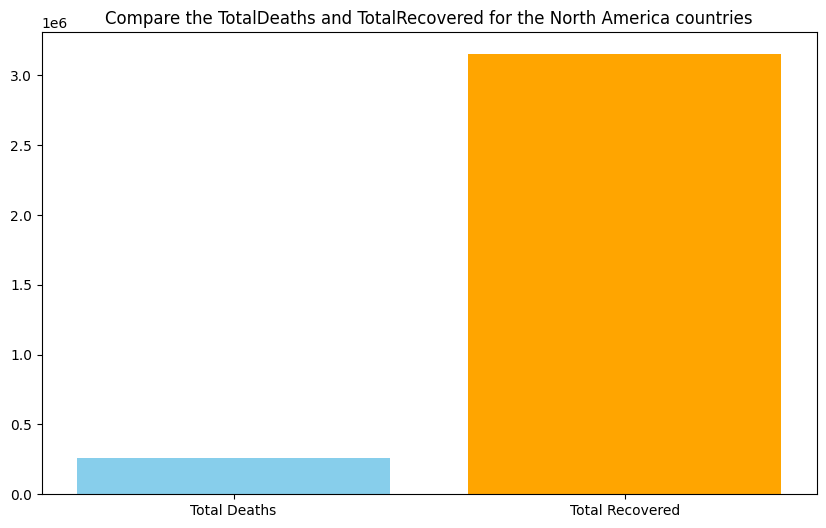

In [20]:
plt.figure(figsize = (10,6))
plt.bar(['Total Deaths', 'Total Recovered'], [North_America['TotalDeaths'].sum(), North_America['TotalRecovered'].sum()], color=['skyblue', 'orange']);
plt.title("Compare the TotalDeaths and TotalRecovered for the North America countries");

## Exploratory Data Analysis

### Continent Wise Data Analysis

In [33]:
analysis_col = ['Population', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical']

Continent_grp = df.groupby('Continent')['Population'].mean().reset_index()
for i in range(1,len(analysis_col)):
  Continent_grp = pd.merge(Continent_grp, df.groupby('Continent')[analysis_col[i]].mean().reset_index(),  on = 'Continent' )
Continent_grp

,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical"
0,Africa,2.368847e+07,17458.258621,512.293103,11970.189655,5106.568966,287.534483
1,Asia,6.611784e+07,97704.041667,2570.520833,73086.875000,22520.770833,613.104167
2,Australia/Oceania,6.826318e+06,3622.500000,1311.166667,2103.333333,1472.333333,453.666667
3,Europe,1.557662e+07,62137.000000,4512.729167,37975.375000,12206.604167,264.083333
4,North America,1.684296e+07,169120.257143,7325.885714,90047.942857,72505.028571,1009.171429
5,South America,3.079360e+07,324519.500000,11334.142857,222582.142857,90874.142857,1059.214286


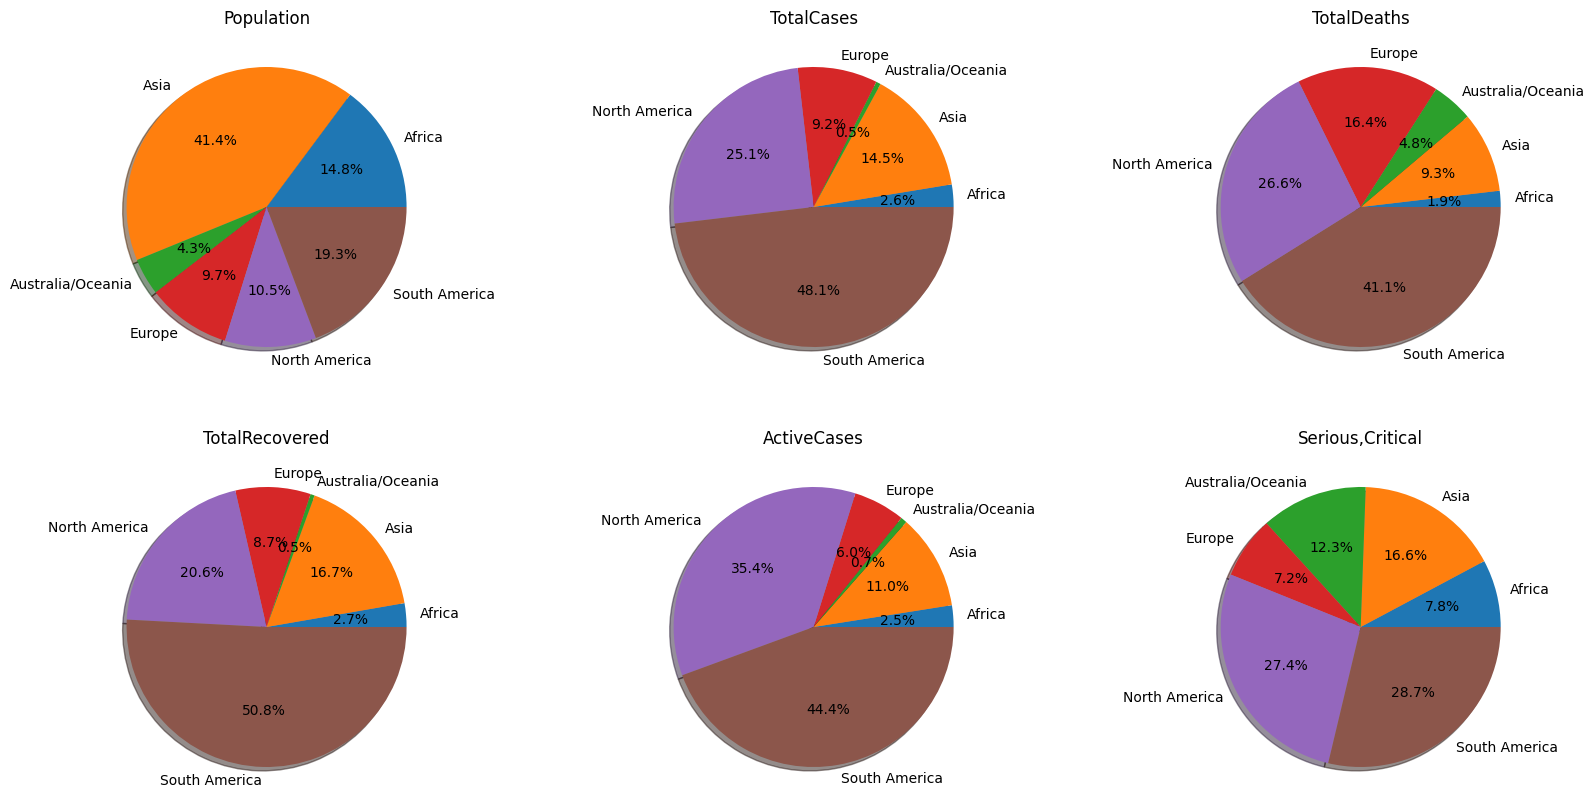

In [34]:
plt.figure(figsize = (20,10))
for i in range(len(analysis_col)):
  plt.subplot(2,3,i+1)
  plt.pie(Continent_grp[analysis_col[i]], autopct='%1.1f%%', labels = Continent_grp['Continent'], shadow=True)
  plt.title(analysis_col[i])

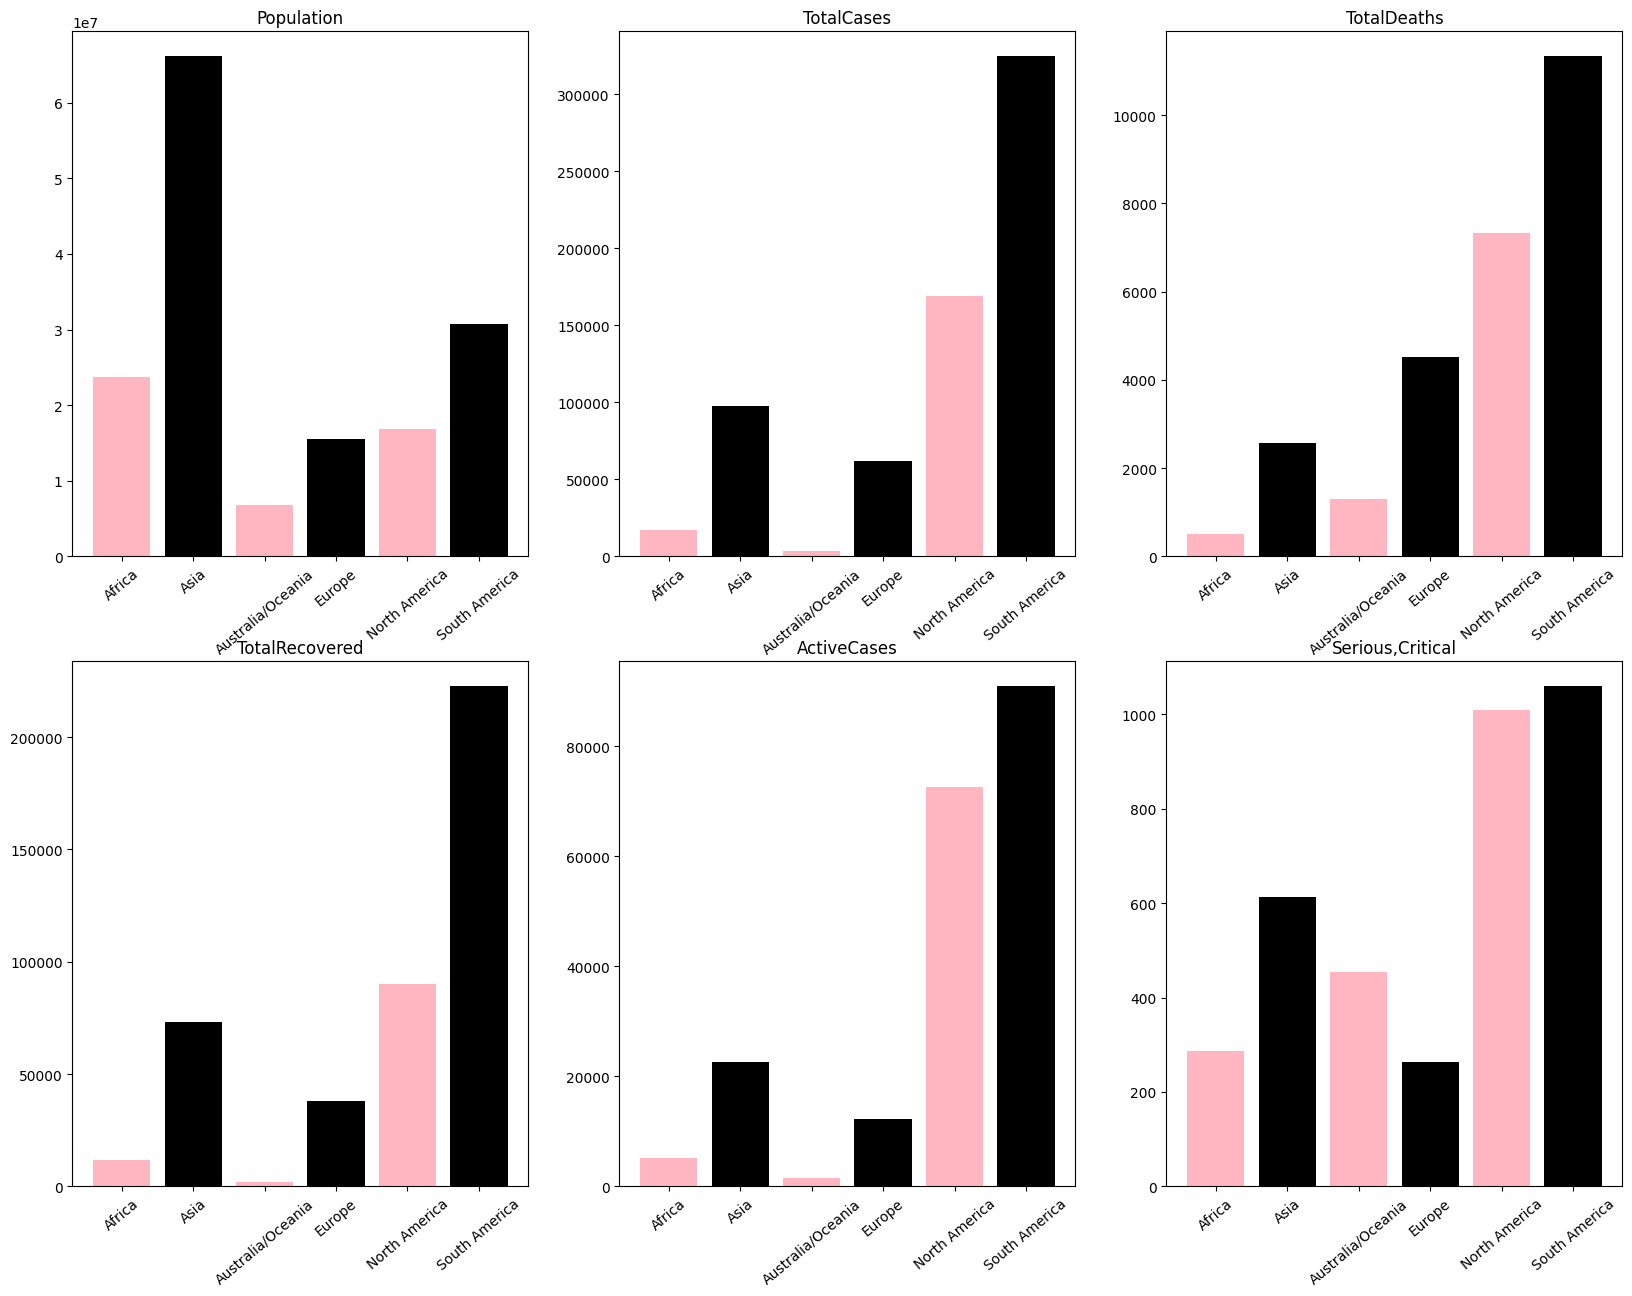

In [38]:
plt.figure(figsize = (20,15))
for i in range(len(analysis_col)):
  plt.subplot(2,3,i+1)
  plt.bar(Continent_grp['Continent'], Continent_grp[analysis_col[i]], color=['lightpink', 'black'])
  plt.title(analysis_col[i])
  plt.xticks(Continent_grp['Continent'], rotation=40)

# **Data Modelling**
**Task 1:** Incorporate 3 Descriptive Statistic methods and Data Visualization to describe and summarize data.

**Task 2:** Define a `function` including a `Series` method, then use `apply()` to execute it over the column(s).

*note*: seaborn and complex methods will be considered for full mark.

*note*: you can use Series methods from here:
https://pandas.pydata.org/docs/reference/series.html

In [21]:
list(df.select_dtypes(include = 'number').columns)

['Population',
 'TotalCases',
 'TotalDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop']

In [22]:
# method 1: Continent wise Cases Comparison 
ActiveCases = df.groupby(['Continent'])['ActiveCases'].mean().reset_index()
Serious = df.groupby(['Continent'])['Serious,Critical'].mean().reset_index()
TotalRecovered = df.groupby(['Continent'])['TotalRecovered'].mean().reset_index()

In [23]:
result = pd.merge(ActiveCases, TotalRecovered,  on = 'Continent')
result = pd.merge(result, Serious, on = 'Continent')
result

,Continent,ActiveCases,TotalRecovered,"Serious,Critical"
0,Africa,5106.568966,11970.189655,287.534483
1,Asia,22520.770833,73086.875000,613.104167
2,Australia/Oceania,1472.333333,2103.333333,453.666667
3,Europe,12206.604167,37975.375000,264.083333
4,North America,72505.028571,90047.942857,1009.171429
5,South America,90874.142857,222582.142857,1059.214286


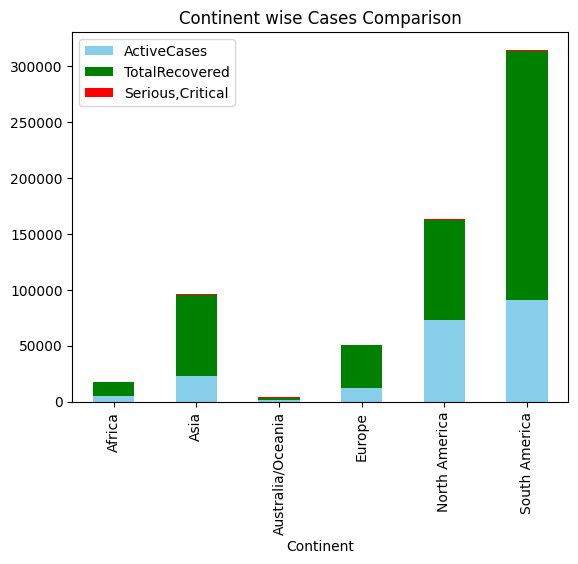

In [24]:
# plt.figure(figsize = (10, 7))
result.plot(x='Continent', kind='bar', stacked=True,
        title='Continent wise Cases Comparison', color=['skyblue', 'green', 'red']);

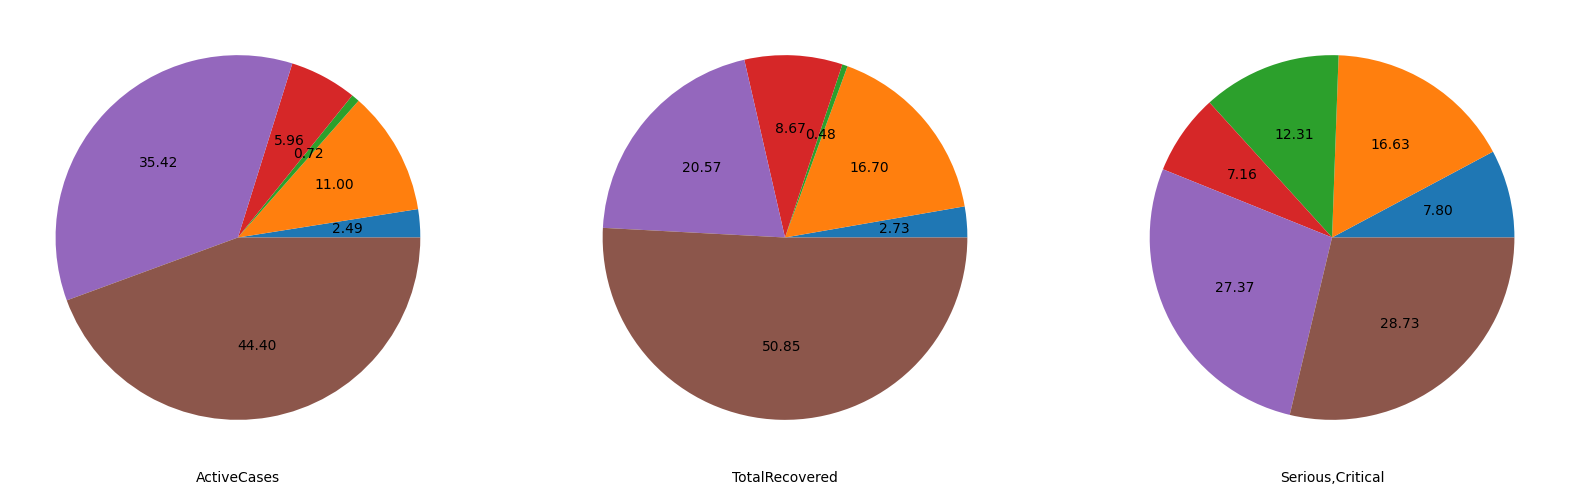

In [25]:
plt.figure(figsize = (20,10))
col = ['ActiveCases',	'TotalRecovered',	'Serious,Critical']

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.pie(result[col[i]], autopct = '%.2f');
  plt.xlabel(f'{col[i]}')


In [26]:
df.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases',
       'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'WHO Region'],
      dtype='object')

In [27]:
# method 2: add your solution here.


In [28]:
top = df.sort_values(by = 'Deaths/1M pop', ascending = False).reset_index(drop = True).head(10)
top

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,San Marino,Europe,33938.0,699,42.0,657.0,0.0,534.0,20596.0,1238.0,6068.0,178797.0,Europe
1,Belgium,Europe,11594739.0,71158,9859.0,17661.0,43638.0,61.0,6137.0,850.0,1767120.0,152407.0,Europe
2,UK,Europe,67922029.0,308134,46413.0,58879.0,27664.0,73.0,4537.0,683.0,17515234.0,257873.0,Europe
3,Andorra,Europe,77278.0,944,52.0,828.0,64.0,1.0,12216.0,673.0,3750.0,48526.0,Europe
4,Peru,South America,33016319.0,455409,20424.0,310337.0,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
5,Spain,Europe,46756648.0,354530,28500.0,58879.0,27664.0,617.0,7582.0,610.0,7064329.0,151087.0,Europe
6,Italy,Europe,60452568.0,249204,35187.0,201323.0,12694.0,42.0,4122.0,582.0,7099713.0,117443.0,Europe
7,Sweden,Europe,10105596.0,81967,5766.0,58879.0,27664.0,38.0,8111.0,571.0,863315.0,85429.0,Europe
8,Chile,South America,19132514.0,366671,9889.0,340168.0,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
9,USA,North America,331198130.0,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas


In [29]:
high_death = top[['Country/Region']]
high_death

,Country/Region
0,San Marino
1,Belgium
2,UK
3,Andorra
4,Peru
5,Spain
6,Italy
7,Sweden
8,Chile
9,USA


In [30]:
# method 3: Correlation between the data.
df.corr()

<ipython-input-30-9875e90aa46b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Population,1.000000,0.546100,0.429177,0.589869,0.458866,0.574506,-0.009337,0.025521,0.496558,-0.074921
TotalCases,0.546100,1.000000,0.936255,0.984267,0.967951,0.953473,0.252600,0.279689,0.889247,0.029083
TotalDeaths,0.429177,0.936255,1.000000,0.905990,0.900055,0.891973,0.230623,0.425115,0.845953,0.044828
TotalRecovered,0.589869,0.984267,0.905990,1.000000,0.914566,0.933500,0.267335,0.269280,0.845591,0.021733
ActiveCases,0.458866,0.967951,0.900055,0.914566,1.000000,0.937564,0.212003,0.232278,0.887003,0.028706
"Serious,Critical",0.574506,0.953473,0.891973,0.933500,0.937564,1.000000,0.184520,0.221902,0.844982,0.016694
Tot Cases/1M pop,-0.009337,0.252600,0.230623,0.267335,0.212003,0.184520,1.000000,0.488129,0.189248,0.295130
Deaths/1M pop,0.025521,0.279689,0.425115,0.269280,0.232278,0.221902,0.488129,1.000000,0.261418,0.130031
TotalTests,0.496558,0.889247,0.845953,0.845591,0.887003,0.844982,0.189248,0.261418,1.000000,0.096177
Tests/1M pop,-0.074921,0.029083,0.044828,0.021733,0.028706,0.016694,0.295130,0.130031,0.096177,1.000000


<ipython-input-31-9cb68f7f38c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True);


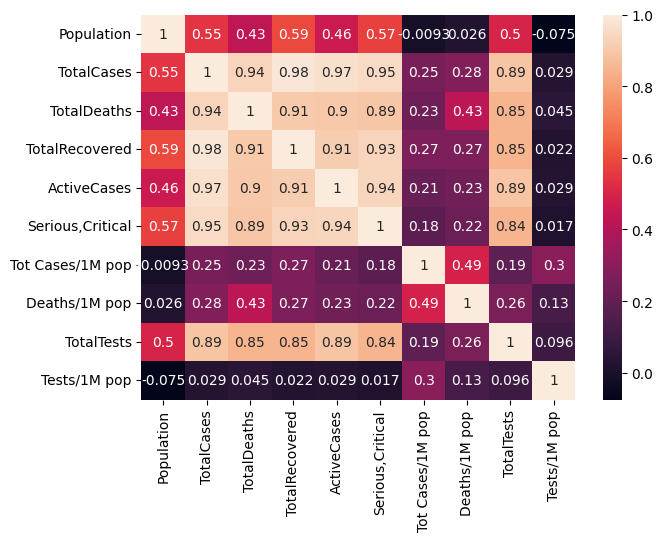

In [31]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True);

In [32]:
# add a function and Series methods here.

# **LSEP Consideration on Data Analysis projects [10 marks]**

Share your thoughts on the Legal, Social, Ethical and Professional (LSEP) considerations for Data analysis projects


---

## add your thoughts here.

---
